# Discussion 1 - The Curse of Dimensionality - Solutions

## Problem Statement

**We are so used to living in three dimensions (not including time) that our intuition fails us when we try to imagine a high-dimensional space. Even a basic 4D hypercube is incredibly hard to picture in our minds, let alone a 200-dimensional ellipsoid bent in a 1,000-dimensional space.**

**It turns out that many things behave very differently in high-dimensional space. For example, if you pick a random point in a unit square (a  square), it will have only about a 0.4% chance of being located less than 0.001 from a border (in other words, it is very unlikely that a random point will be “extreme” along any dimension). But in a 10,000-dimensional unit hypercube, this probability is greater than 99.999999%. Most points in a high-dimensional hypercube are very close to the border. This phenomenon is known as The Curse of Dimensionality.**

**Download this Jupyter Notebook  Download this Jupyter Notebookand study the 2 examples herein. Answer the following questions:**

1. **Based on the results in the Notebook, what is the average distance between 2 points in a unit square? What about the unit 3D cube? What about the unit 100D cube?**

Based on the average results presented in the examples shown below, if you pick two points randomly in a unit square, the distance between two points will be, one average, roughly 0.52. If you pick two random points in a unit 3D cube, the average distance will be roughly 0.65. For a 100D hypercube, the average distance is 4.07. For a 1,000,000-dimensional hypercube, the average distance is about 408.25 (roughly $\sqrt{1,000,000/6}$)!

2. **Explain in words what the curse of dimensionality is and how it impacts the field of machine learning.**

The average distance between two randomly selected points in a unit D-dimensional cube increases with $D$. This is counterintuitive. Well, there's plenty of space in high dimensions. As a results, high-dimensional datasets are at risk of being very sparse: most training instances are likely to be far away from each other. This also means that a new instance will likely be far away from any training instance, making predictions much less reliable than in lower dimensions, since they will be based on much larger extrapolations. In short, the more dimensions the training set has, the greater the risk of overfitting it.

3. **Based off of our in-class discussions, describe solutions to mitigate the curse of dimensionality.**

In theory, one solution to the curse of dimensionality could be to increase the size of the training set to reach a sufficient density of training instances. Unfortunately, in practice, the number of training instances required to reach a given density grows exponentially with the number of dimensions. With just 100 features (significantly fewer than in the MNIST problem), you would need more training instances than atoms in the observable universe in order for training instances to be within 0.1 of each other on average, assuming they were spread out uniformly across all dimensions.

Other solutions to the curse of dimensionality include dimensionality reduction approaches such as: feature selection, feature extraction via (linear or non-linear) projections and manifold learning.

---

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.spatial.distance import cdist
%matplotlib notebook
plt.style.use('bmh')

# Example 1 - Distance of points randomly sampled from a Gaussian PDF to its mean

In this example, we will compute the distance of a randomly sampled point from a D-dimensional Gaussian distribution to its mean (zeros-vector).

We will plot the distances as the dimensionality $D$ increases.

<IPython.core.display.Javascript object>


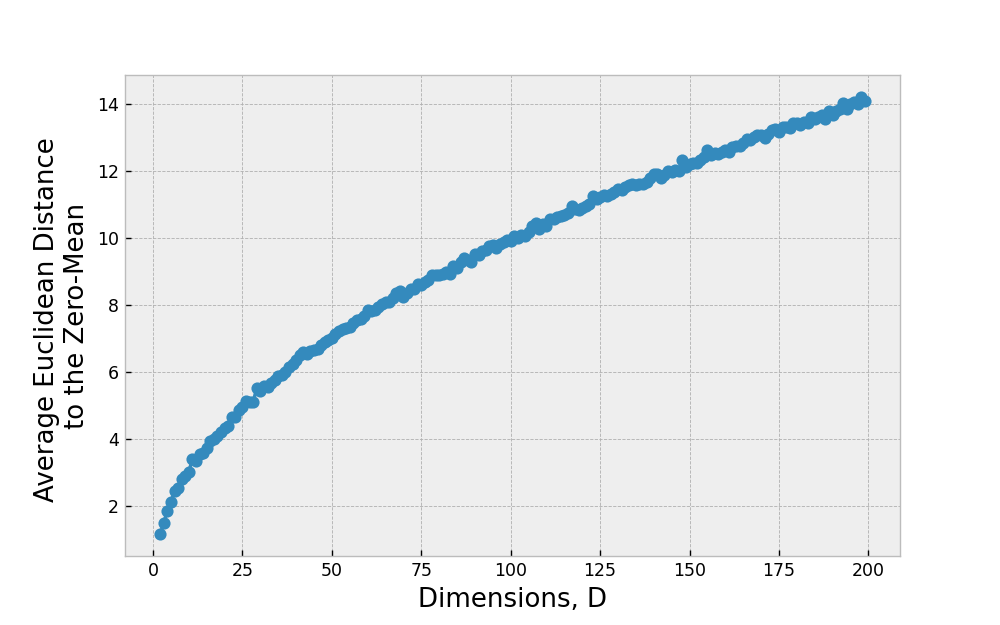

In [2]:
# Example 1 - Distance of points randomly sampled from a Gaussian PDF to its mean

D_vals = np.arange(2,200)
N_samples = 100

avg_dist = []

for D in D_vals:
    mu = np.zeros(D) # zeros-mean vector
    cov=np.eye(D) # covariance matrix is the identity matrix (no correlation, same variance accross all dimensions)

    # Defines the PDF for multivariate Gaussian random variable or RV (D-dimensions)
    X = stats.multivariate_normal(mean=mu, cov=cov)
    
    # Randomly samples N_samples points from this RV, considering only right tail
    samples = X.rvs(size=N_samples)
    
    # Compute distances of each sample to the mean
    distances = cdist(samples, mu.reshape(-1,1).T, metric='euclidean')
    
    # Append average distance to variable "avg_dist"
    avg_dist += [np.mean(distances)]

# Visualizations
plt.figure(figsize=(8,5))
plt.plot(D_vals, avg_dist,'-o')
plt.xlabel('Dimensions, D', size=15)
plt.ylabel('Average Euclidean Distance \nto the Zero-Mean', size=15);

---

# Example 2 - Distance between 2 randomly selected points in a cube of dimension D (hypercube)

In this example, we will measure the distance between two randomly selected points inside a unit D-dimensional cube (or hypercube).

We will plot this distance as the number of dimeensions $D$ increases.

<IPython.core.display.Javascript object>


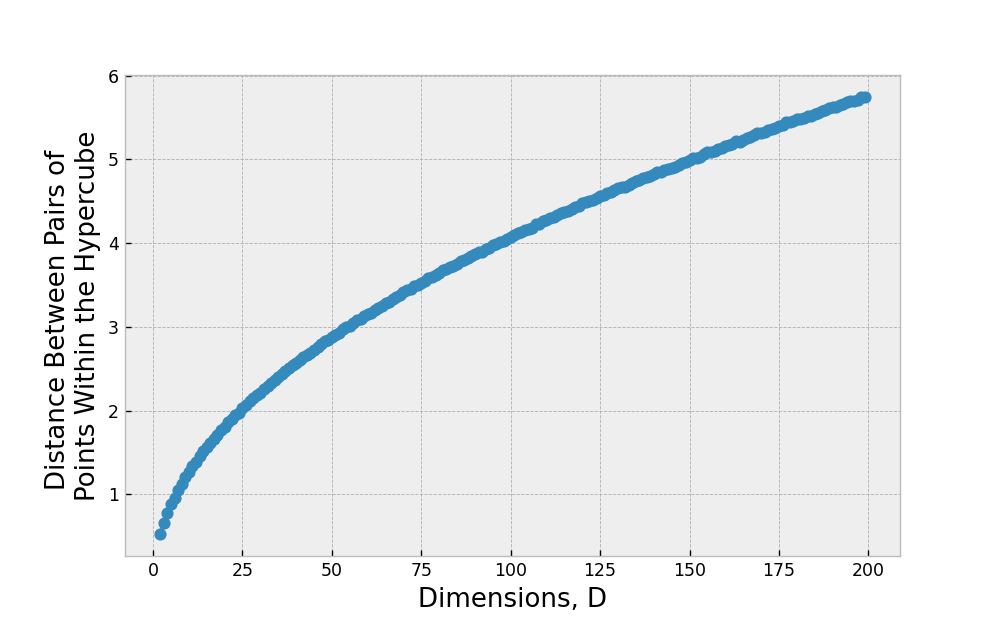

In [3]:
# Example 2 - Distance between 2 randomly selected points in a cube of dimension D (hypercube)

D_vals = np.arange(2,200) # You may change the cahnge or list of values for D
N_samples = 1_000 # You may increase the sample size here
distance_in_cube = []

for D in D_vals:
    # Randomly selecting 2 points in a unit-hypercube
    samples = stats.uniform(loc=0,scale=1).rvs(size=[N_samples,D])
    
    # Computing the Euclidean distance between points in unit hypercube
    pairwise_distances = cdist(samples, samples,metric='euclidean')
    distance_in_cube += [np.mean(pairwise_distances[np.triu_indices(N_samples,1)])] 
    
# Visualizations
plt.figure(figsize=(8,5))
plt.plot(D_vals, distance_in_cube,'-o')
plt.xlabel('Dimensions, D', size=15)
plt.ylabel('Distance Between Pairs of \nPoints Within the Hypercube', size=15);

In [4]:
distance_in_cube=np.array(distance_in_cube)

In [5]:
print('Distance between two random points in a unit square: ', 
      distance_in_cube[D_vals==2][0])

print('Distance between two random points in a unit 3D cube: ', 
      distance_in_cube[D_vals==3][0])

print('Distance between two random points in a unit 100D hypercube: ', 
      distance_in_cube[D_vals==100][0])

Distance between two random points in a unit square:  0.5200858397901891
Distance between two random points in a unit 3D cube:  0.6501374653840953
Distance between two random points in a unit 100D hypercube:  4.073835390538882


---